In [1]:
# LIBRERIAS
import matplotlib
from ipywidgets.widgets.widget_string import Label
from ipywidgets import interact,widgets
import numpy as np
from scipy.stats import norm
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d
import math
from scipy.integrate import solve_ivp
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
%matplotlib inline 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)
import seaborn as sns
import os
from scipy.stats import anderson

#to en otra carpeta
sns.set_theme()

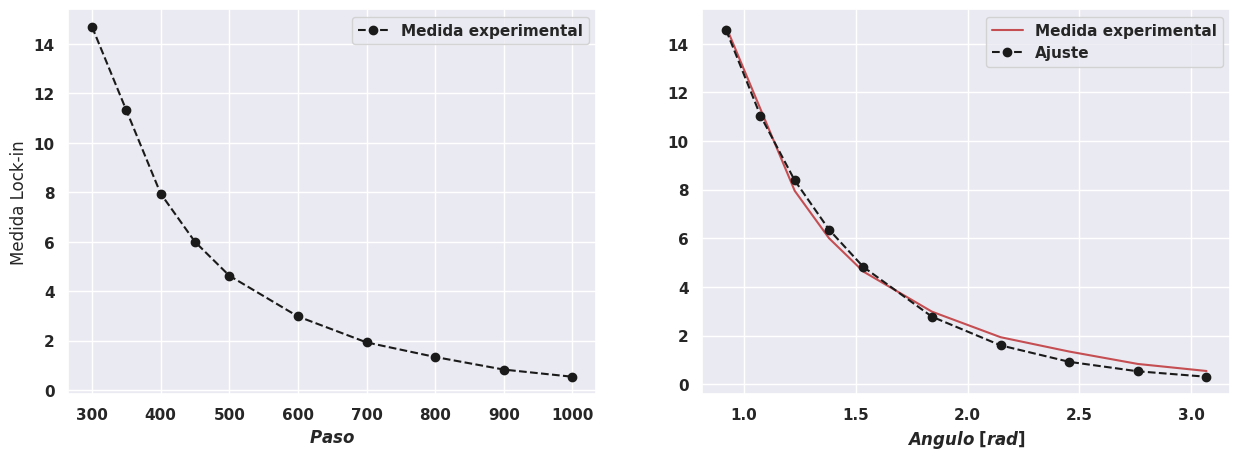

In [27]:
def convert(paso):
    return paso/2048*360 # Convierte de paso a angulo

def ajusteP(paso,a,b):
    return a*10**(-convert(paso)*np.pi/180*b)

pasos=np.array([300,350,400,450,500,600,700,800,900,1000])
Med_e=np.array([14.70,11.32,7.95,6.00,4.63,2.98,1.93,1.34,0.83,0.54])
popt, cov= curve_fit(ajusteP,pasos,Med_e)

f=plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(pasos,Med_e,'--ko',label='Medida experimental')
#plt.plot(pasos,ajusteP(pasos,*popt),'--ro',label='Ajuste')
plt.xlabel('$Paso$')
plt.ylabel('Medida Lock-in')
plt.legend()

plt.subplot(122)
plt.plot(convert(pasos)*np.pi/180,Med_e,'r',label='Medida experimental')
plt.plot(convert(pasos)*np.pi/180,ajusteP(pasos,*popt),'--ko',label='Ajuste')
plt.xlabel('$Angulo$ $[rad]$')
plt.legend()


Text(0.5, 0, '$Corriente$ $[mA]$')

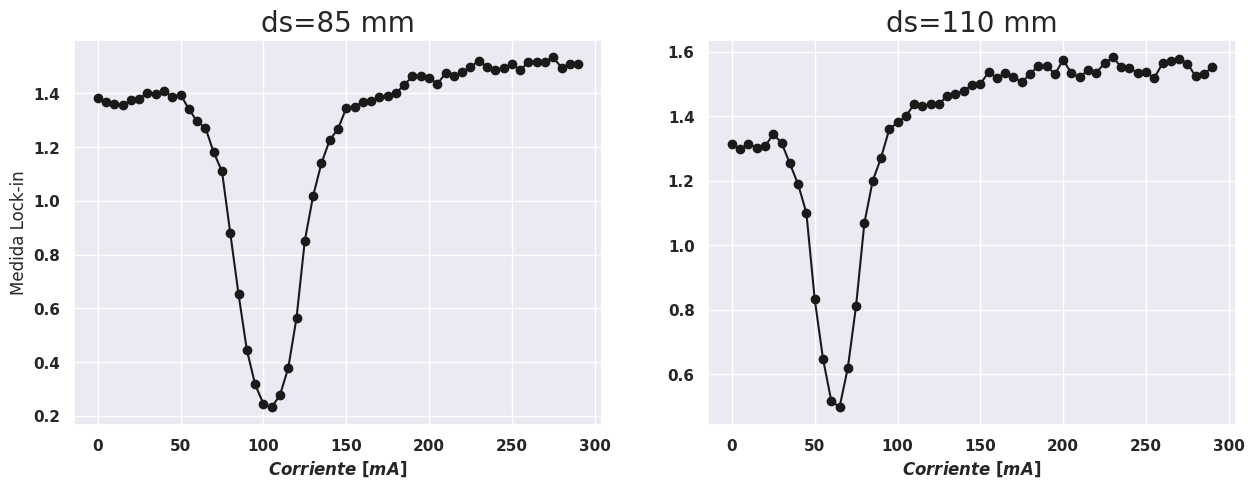

In [52]:
nombres=['F-scan_100mm_9.txt','F-scan_100mm_10.txt']

long=100

m1=np.loadtxt(nombres[0])
c1=m1[:,0]
l1=m1[:,1]

m1=np.loadtxt(nombres[1])
c2=m1[:,0]
l2=m1[:,1]

f=plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(c1,l1,'-ko')
plt.xlabel('$Corriente$ $[mA]$')
plt.ylabel('Medida Lock-in')
plt.title('ds='+str(85)+' mm',fontsize=20)

plt.subplot(122)
plt.plot(c2,l2,'-ko')
plt.title('ds='+str(110)+' mm',fontsize=20)
plt.xlabel('$Corriente$ $[mA]$')